<a href="https://colab.research.google.com/github/hemanth2000/fft-notes/blob/main/FourierSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier Transforms and Wavelets

This repository is summary on Fourier Transform.

In engineering, transformation of coordinate system of the problem is often applied to make equations simple and decoupled. Fourier Transform is such transformation which involves sine and consine functions of increasing frequency that provide orthogonal basis for the space of solution functions.

## Fourier Series

Fourier series is the represention of a periodic function in terms of sines and consines of increasing frequencies.

Let $2L$ be the periodicity of the function $f(x)$.

$$f(x) = \frac{A(0)}{2}+\sum_{k=1}^{\infty} A(k)cos(\frac{\pi}{L}kx)+B(k)sin(\frac{\pi}{L}kx)$$

$$ A(k) = \frac{1}{L}\int_{-L}^{L} f(x)cos(\frac{\pi}{L}kx) dx$$

$$B(k) =\frac{1}{L}\int_{-L}^{L} f(x)sin(\frac{\pi}{L}kx) dx$$


## Gibbs Phenomenon

Gibbs phenomenon is observed at the discontinuities while representing using finite terms of fourier series.

## Fourier Transform

Fourier Transform is representation of non periodic functions in the form of the sines and cosines. Mathematically, $L$ tends to $\infty$.

In complex form the function $f(x)$ is represented as,

$$f(x) = \sum_{k=-\infty}^{+\infty} C(k) e^{i\pi k\frac{x}{L}}$$

$$C(k)=\frac{1}{2\pi}\int_{-L}^{L}f(x)e^{-i\pi k\frac{x}{L}} dx$$

Substituting $C(k)$ in $f(x)$ and taking limit $L\to ∞$ ,

$$f(x) = \lim_{\Delta\omega\to0 \\ L\to∞} \sum_{k=-\infty}^{+\infty} \frac{\Delta\omega}{2\pi}\int_{\frac{-\pi}{\Delta\omega}}^{\frac{\pi}{\Delta\omega}} f(\xi) e^{-i k \Delta\omega\xi} \, d{\xi} \, e^{ik\Delta\omega x}$$
$$ = \int_{-∞}^{∞} \frac{1}{2\pi} \int_{-∞}^{∞} f(\xi) e^{-i\xi\omega} \, d\xi \, e^{i\omega x} \, d\omega$$

From the above equation, Fourier transform of function $f(x)$ is defined as,

$$
\hat{f}(\omega)=  \int_{-∞}^{∞}f(x)e^{-i\omega x}dx
$$

Inverse fourier transform is 

$$f(x)=\frac{1}{2\pi} \int_{-∞}^{∞} \hat{f}(\omega)e^{i\omega x} d\omega$$

# Discrete Fourier Transform

The measurements in any experiments are not continuous rather in discrete fashion. 


Lets assume that only function values at discrete points are known. DFT is applied to calculate the fourier coefficients for the function using the discrete function values. 

$$\left[ f_0, f_1, f_2, f_3, \dots, f_{n-1}\right]\, \underset{\implies}{DFT} \, \left[ \hat{f_0}, \hat{f_1} , \hat{f_2}, \hat{f_3}, \dots,\hat{f}_{n-1} \right]$$

$$ \omega_n = e^{-\frac{2 \pi}{n}i} $$

$$\begin{bmatrix}\hat{f}_0 \\ \hat{f}_1 \\ \hat{f}_2 \\ \vdots \\ \hat{f}_{n-1}\end{bmatrix}=\begin{bmatrix}
1 & 1 & 1 &\dots & 1\\
1 & \omega_n & \omega_n^2 & \dots & \omega_n^{n-1} \\
1 & \omega_n^2 & \omega_n^4 & \dots & \omega_n^{2(n-1)} \\
\vdots & \vdots & \vdots  & \ddots & \vdots \\
1 & \omega_n^{n-1} & \omega_n^{2(n-1)} & \dots & \omega_n^{(n-1)^2}
\end{bmatrix}\begin{bmatrix}f_0 \\ f_1 \\f_2 \\ \vdots \\ f_{n-1}\end{bmatrix}$$


In [22]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt


In [31]:
n = 1024
w = np.exp(-1j*2*np.pi/n)

[xv,yv]=np.meshgrid(np.arange(n),np.arange(n))
DFT=np.power(w,xv*yv)

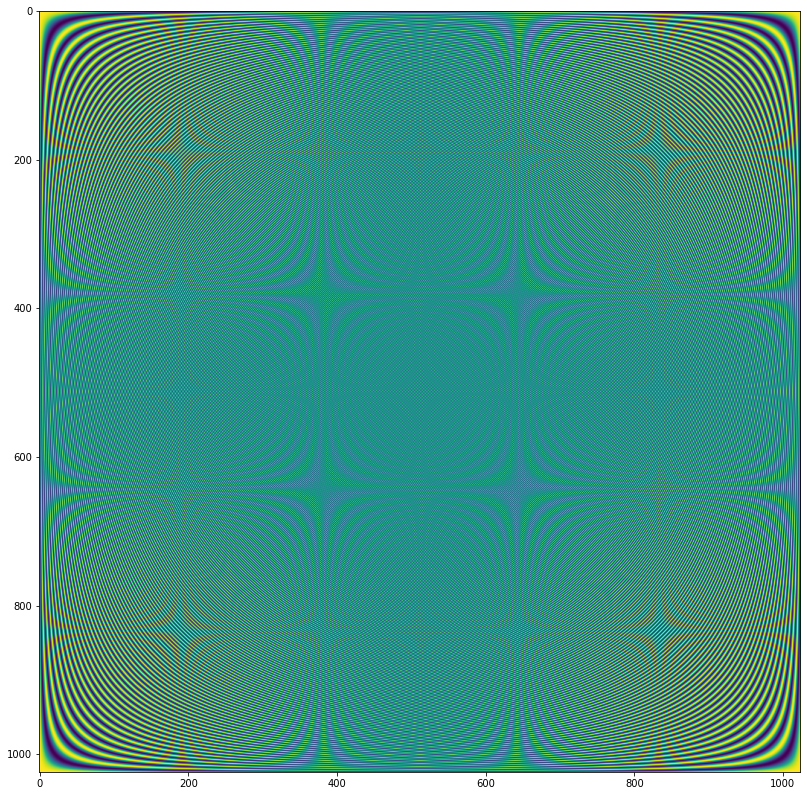

In [32]:
plt.figure(figsize=(14,14))
plt.imshow(np.real(DFT))
plt.show()

# Fast Fourier Transform

FFT is used to compute the DFT efficiently. This is most widely used numerical techinique in computing.

The order of computation is $O(nlog(n))$.

**Uses of FFT:**

- Calcuating derivates to solve PDEs
- Denoising the data
- Data analysis
- Data compression




## Denoising the data

In [34]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

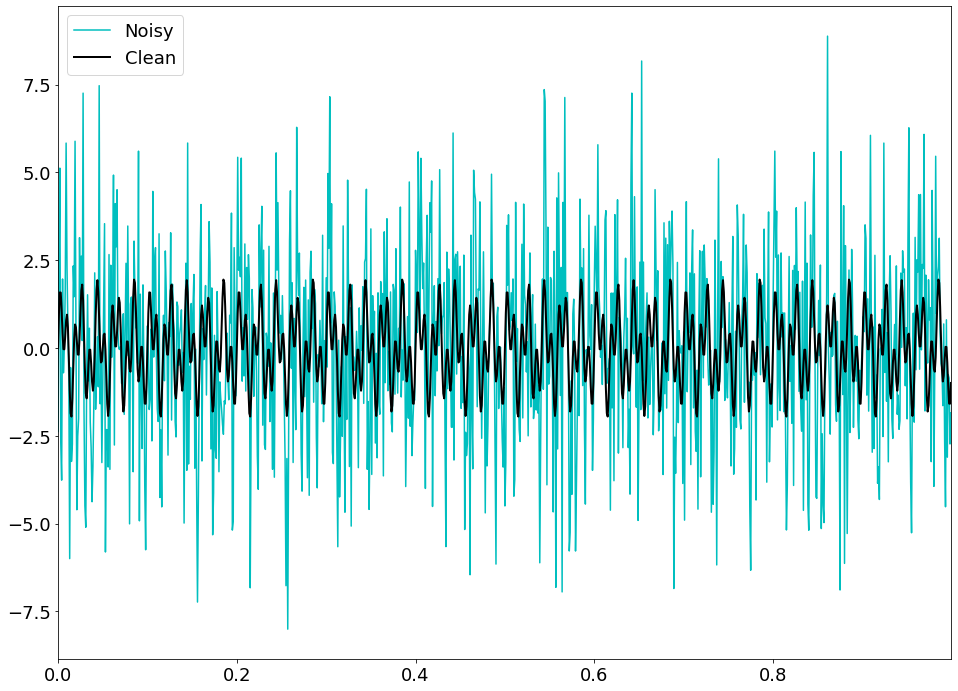

In [35]:
dt = 0.001
t = np.arange(0,1,dt)
f =np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Two frequencies 50Hz and 120Hz are added 
f_clean = f 
f = f + 2.5 * np.random.randn(len(t))  # Adding noise

plt.plot(t,f,color='c',LineWidth=1.5,label="Noisy")
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.legend()
plt.xlim(t[0],t[-1])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


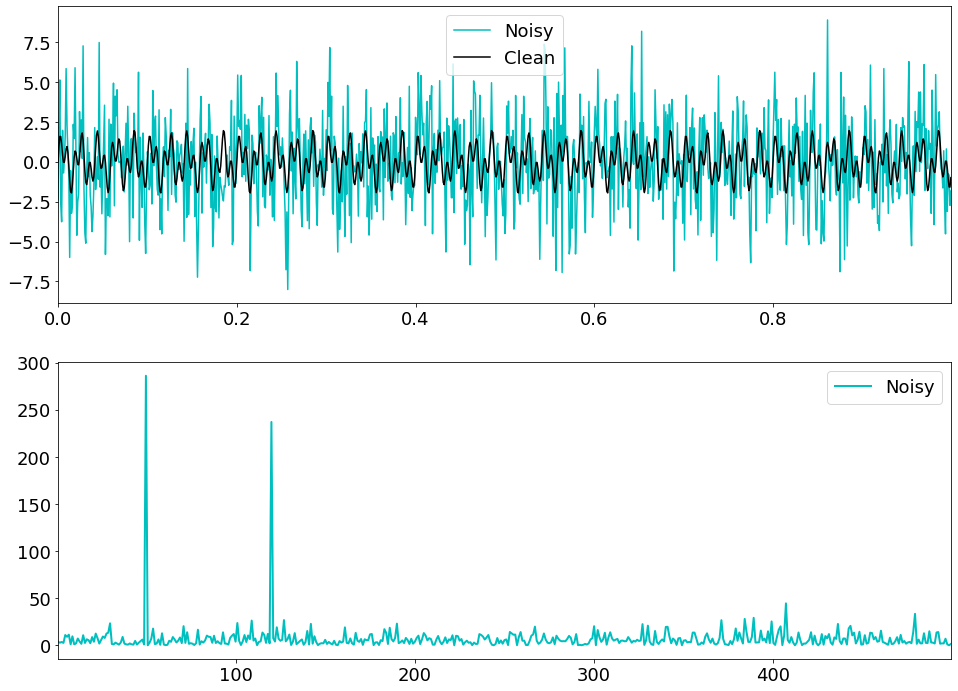

In [37]:
# Computing Fast Fourier Transform

n =len(t)
fhat = np.fft.fft(f,n)              # FFT computation
PSD = fhat * np.conj(fhat)/n        # Power spectrum
freq = (1/(dt*n))*np.arange(n)      # Create x-axis of the frequency
L = np.arange(1,np.floor(n/2),dtype = 'int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5, label = "Noisy")
plt.plot(t,f_clean,color='k',LineWidth=1.5, label = "Clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2, label = "Noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()



In [38]:
indices = PSD > 100 
PSDclean = PSD * indices
fhat = indices * fhat
ffilt=np.fft.ifft(fhat)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


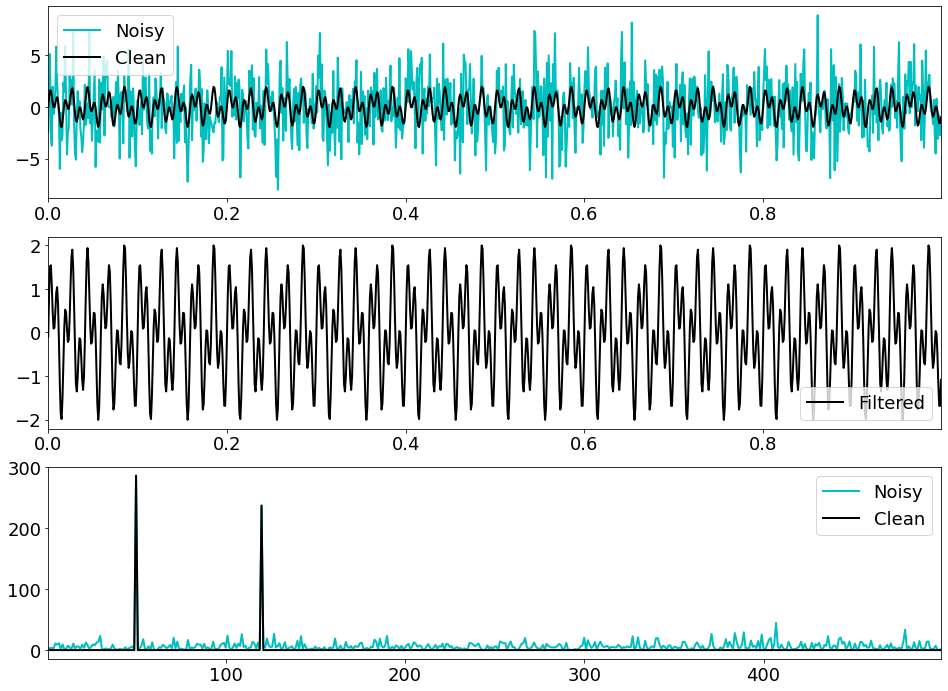

In [40]:
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=2, label = "Noisy")
plt.plot(t,f_clean, color="k",LineWidth=2, label ='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',LineWidth = 2, label ="Filtered")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color="c",LineWidth=2,label="Noisy")
plt.plot(freq[L],PSDclean[L],color="k",LineWidth=2,label="Clean")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

## Computing Derivatives with FFT

In this section, derivative of a function in three different ways and comparision is made among them.


In [45]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

In [46]:
n = 64
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x)*np.exp(-np.power(x,2)/25)+(2/25)*x*f) # Derivative

In [47]:
dfFD =  np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
  dfFD[kappa]=(f[kappa+1]-f[kappa])/dx

dfFD[-1]=dfFD[-2]

In [51]:
fhat= np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa)
dfhat = kappa* fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


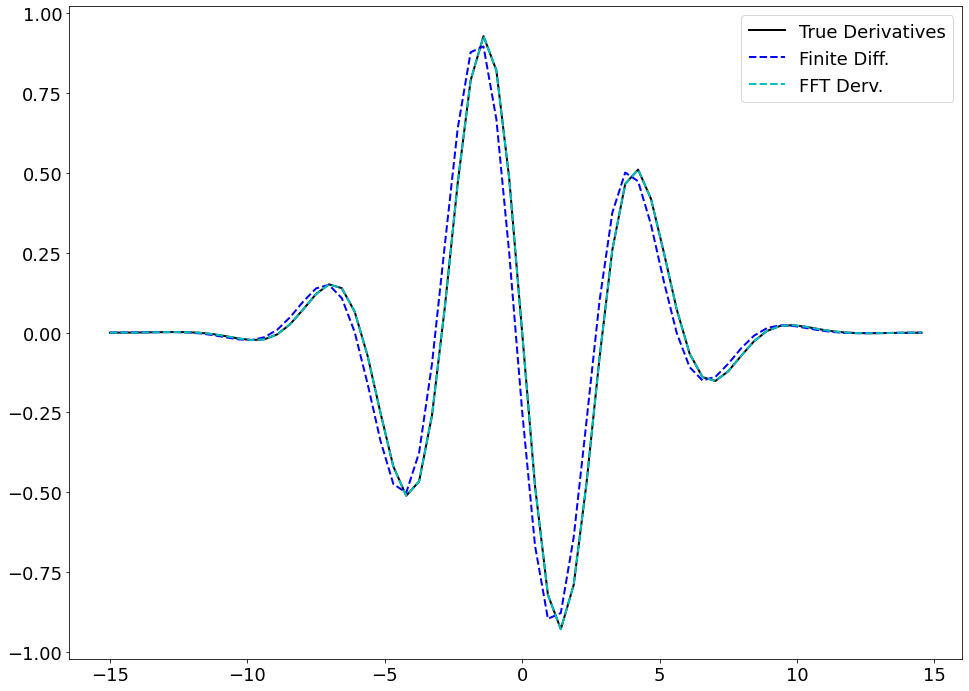

In [54]:
plt.plot(x,df.real,'k',LineWidth=2,label = "True Derivatives")
plt.plot(x,dfFD.real,'--b',LineWidth=2,label = "Finite Diff.")
plt.plot(x,dfFFT.real,'--c',LineWidth=2,label='FFT Derv.')
plt.legend()
plt.show()

## Solving PDE with FFT